# Wine Quality Classification 

In [1]:
#Importing the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
#Loading dataset
df=pd.read_csv("winequality-white.csv",sep=";")
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


Now let's perform some EDA.

In [3]:
#Checking if no null or NaN values present
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Thus our data has no null or NaN values

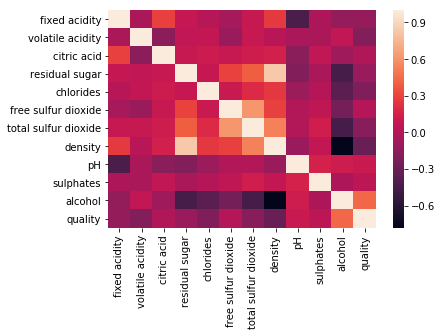

In [4]:
#Correlation between the variables
df.corr()
sns.heatmap(df.corr())

This map suggests that "volatile acidity", "chlorides" and "density" are most negatively related to "quality" i.e. their deccrease leads to improved quality and vice versa. "Alcohol" is the most positively related to "quality" i.e. an increase in alcohol leads to better quality and vice versa.

In [5]:
#Now obtaining boxplots of all variables wrt quality

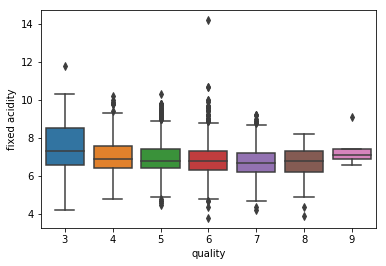

In [6]:
sns.boxplot('quality', 'fixed acidity', data = df)

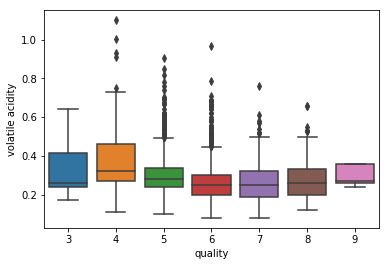

In [7]:
sns.boxplot('quality', 'volatile acidity', data = df)

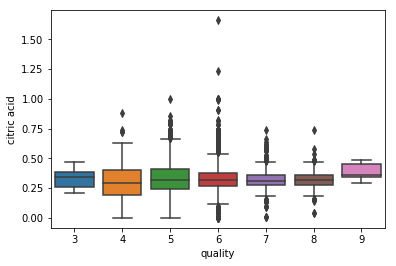

In [8]:
sns.boxplot('quality', 'citric acid', data = df)

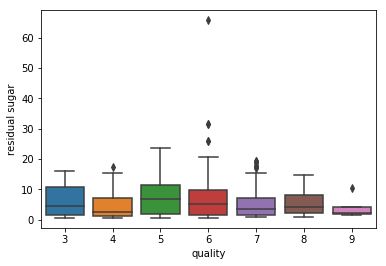

In [9]:
sns.boxplot('quality', 'residual sugar', data = df)

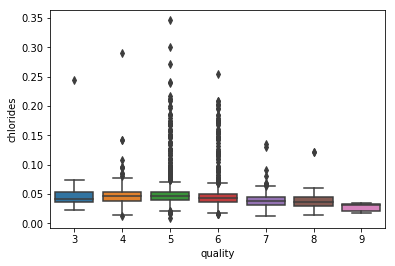

In [10]:
sns.boxplot('quality', 'chlorides', data = df)

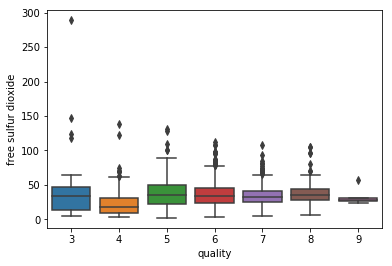

In [11]:
sns.boxplot('quality', 'free sulfur dioxide', data = df)

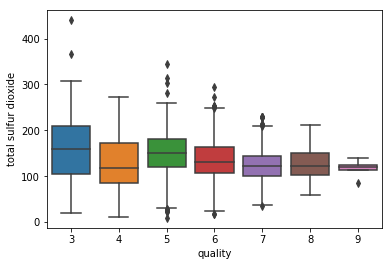

In [12]:
sns.boxplot('quality', 'total sulfur dioxide', data = df)

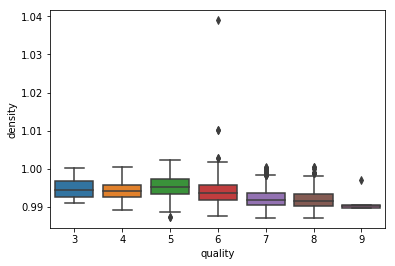

In [13]:
sns.boxplot('quality', 'density', data = df)

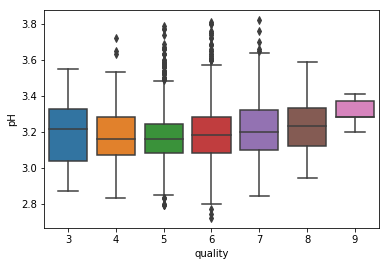

In [14]:
sns.boxplot('quality', 'pH', data = df)

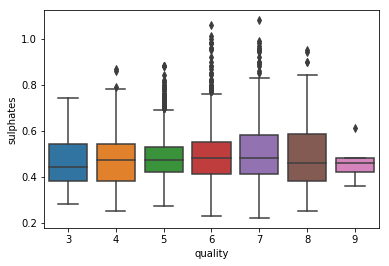

In [15]:
sns.boxplot('quality', 'sulphates', data = df)

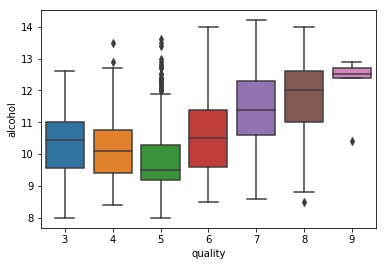

In [16]:
sns.boxplot('quality', 'alcohol', data = df)

Nearly all of the boxplots above suggest the presence of outliers. These outliers are found to affect our model, so we are going to eliminate these based on the z score as follows.

In [17]:
#Outlier removal
z = np.abs(stats.zscore(df))
df=df[(z<3).all(axis=1)]
len(df)

4487

So now we have eliminated most of the outliers.

In [18]:
#Defining our explainatory and dependent variables x and y respectively
x=np.asarray(df.drop('quality',axis=1))
y=np.asarray(df['quality']) #or df.iloc[:,12:]

In [19]:
#Standardizing our explainatory variables as they are in different scales of measurement
x=preprocessing.StandardScaler().fit_transform(x) 

In [20]:
#Train and test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (3589, 11) (3589,)
Test set: (898, 11) (898,)


In [21]:
#Logistic Regression classifier
LR = LogisticRegression(solver='liblinear',multi_class='ovr')
model=LR.fit(x_train,y_train)
y_pred_test=model.predict(x_test)
print("The accuracy using Logistic Regression is %3.2f %%" %(accuracy_score(y_test,y_pred_test)*100))

The accuracy using Logistic Regression is 56.01 %


In [22]:
#Random Forest classifier
RF = RandomForestClassifier(n_estimators=10,random_state=25)
RF.fit(x_train, y_train)
rf_predict=RF.predict(x_test)
print("The accuracy using Random Forest Classifier is %3.2f %%" %(accuracy_score(y_test, rf_predict)*100))

The accuracy using Random Forest Classifier is 68.04 %


Observe that the random forest classifier gives a better model with an accuracy of nearly 68 %. Now I've performed some other calculations to let us know more about our model. 

In [23]:
#Just creating a dataframe of actual and predicted values and performing some other simple calculations
difference_1=0
difference_more=0
df_new=pd.DataFrame()
for i in range(0,len(y_test)):
    row={"Predicted":round(rf_predict[i]),"Actual":round(y_test[i])}
    if(abs(rf_predict[i]-y_test[i])==1):
        difference_1=difference_1+1
    elif(abs(rf_predict[i]-y_test[i])>1):
        difference_more=difference_more+1
    df_new=df_new.append(row,ignore_index=True)

print(df_new.head(5))

   Actual  Predicted
0     6.0        6.0
1     5.0        5.0
2     6.0        6.0
3     6.0        5.0
4     6.0        5.0


Displaying the top 5 actual and predicted values using our random forest model, we can clearly see that the values are nearly the same or differ mostly by 1. 

In [24]:
print("Predicted values in the test data within a difference of 1 from actual values = %2.2f %%" %(difference_1/len(y_test)*100))
print("Predicted values in the test data with a difference of more than 1 from actual values = %2.2f %%" %(difference_more/len(y_test)*100))

Predicted values in the test data within a difference of 1 from actual values = 29.06 %
Predicted values in the test data with a difference of more than 1 from actual values = 2.90 %


We get a better idea of the statement I made above by these results. So only 29 % of the values differ by 1 i.e. the difference between actual and predicted value is 1 for only 29% of our test data. Also, only 3 % (which is a small amount) of the values differ by an amount more than 1. So if we can accept a model which predicts wine quality within a range of plus-minus 1 then this model works great. (Note that these percentages are with respect to the test data)

Based on the above result we can also create bins of size 2 i.e. 5 groups of wine quality ranging from very poor to excellent.

In [25]:
#Creating 5 bins
bins = (0,2,4,6,8,10)
group_names = ['very poor','poor','acceptable','good','excellent']
y = np.asarray(pd.cut(df['quality'], bins = bins, labels = group_names))

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)

In [27]:
LR2 = LogisticRegression(solver='liblinear',multi_class='ovr')
model=LR2.fit(x_train,y_train)
y_pred_test=model.predict(x_test)
print("The accuracy using Logistic Regression is %3.2f %%" %round(accuracy_score(y_test,y_pred_test)*100))

The accuracy using Logistic Regression is 77.00 %


In [28]:
RF2 = RandomForestClassifier(n_estimators=10,random_state=25)
RF2.fit(x_train, y_train)
rf_predict=RF2.predict(x_test)
print("The accuracy using Random Forest Classifier is %3.2f %%" %(accuracy_score(y_test, rf_predict)*100))

The accuracy using Random Forest Classifier is 82.85 %


Creating the 5 groups of quality leads to better accuracy as we can obviously think of. Our random forest model accuracy nearly improved by 15 %. Now let us experiment with just 3 groups for quality.

In [29]:
#Creating 3 bins
bins = (0,4,8,10)
group_names = ['poor','acceptable','excellent']
y = np.asarray(pd.cut(df['quality'], bins = bins, labels = group_names))

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=100)

In [31]:
LR3 = LogisticRegression(solver='liblinear',multi_class='ovr')
model=LR3.fit(x_train,y_train)
y_pred_test=model.predict(x_test)
print("The accuracy using Logistic Regression is %3.2f %%" %round(accuracy_score(y_test,y_pred_test)*100))

The accuracy using Logistic Regression is 97.00 %


In [32]:
RF3 = RandomForestClassifier(n_estimators=10,random_state=25)
RF3.fit(x_train, y_train)
rf_predict=RF3.predict(x_test)
print("The accuracy using Random Forest Classifier is %3.2f %%" %(accuracy_score(y_test, rf_predict)*100))

The accuracy using Random Forest Classifier is 98.22 %


Creating just 3 bins for quality leads to even better models with random forest accuracy being 98 % and logistic regression performing nearly the same. So creating these bins for classification will lead to better accuracy models but their creation is very biased with respect to the bin size and the number of bins. Also, we have to keep in mind that as the training data is small, out model may overfit. We can go along with the original random forest model if a minute difference of 1 in the quality won't matter to us, or can select the 5 or 3 bins model as above according to our requirements. 